In [1]:
import rootpath
import sys
sys.path.append(rootpath.detect())

from wfg import WFG2
import wfg
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.cm import viridis 

In [2]:
def distance_matrix(y, normalise=True):
    M = np.zeros((y.shape[0], y.shape[0]))
    for i, yi in enumerate(y):
        for j, yj in enumerate(y):
            m = yi-yj
            M[i, j] = np.sqrt(np.dot(m, m.T))
    if normalise:
        return M/np.max(M)
    else:
        return M

In [3]:
kfactor = 1
lfactor = 1
n_objectives = 3
n_dims = lfactor * 2 + kfactor

k = kfactor * (n_objectives - 1)
l = lfactor * 2

func = WFG2
def wfg2(x):
    if x.ndim == 1:
        assert (x.shape[0] == n_dims)
        x = x.reshape(1, -1)
    return np.array([func(xi, k, n_objectives) for xi in x])

In [4]:
N = 10000 
y = np.zeros((N, n_objectives))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y[n,:] = func(z, k, n_objectives)

In [5]:
y.shape

(10000, 3)

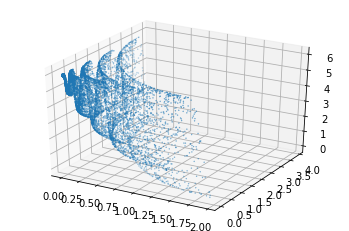

In [6]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.scatter(*y.T, s=0.1)

In [7]:
from testsuite.utilities import Pareto_split
orig_p = Pareto_split(y)[0]

In [9]:
orig_M = distance_matrix(orig_p)
orig_M[orig_M==0] = 1.

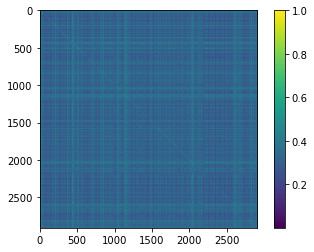

In [14]:
plt.imshow(orig_M)
plt.colorbar()

In [29]:
orig_w = (orig_M<0.10).sum(axis=0)
orig_w = 1/orig_w

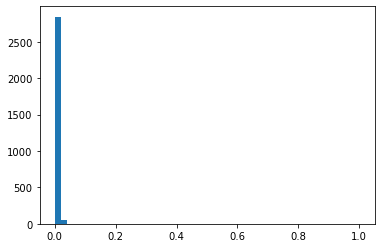

In [30]:
plt.hist(orig_w, bins=50);

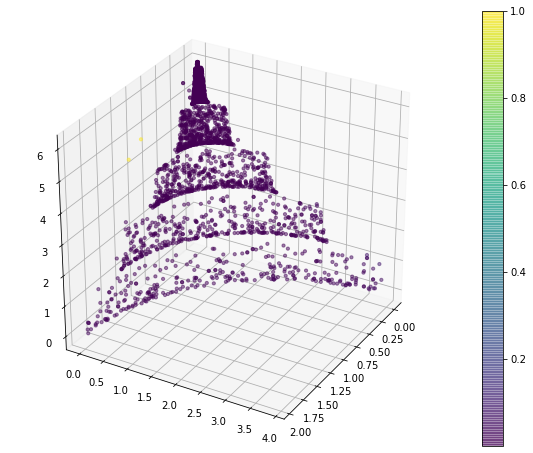

In [127]:
fig = plt.figure(figsize=[10,8])
ax = fig.gca(projection="3d")
ax.view_init(30, 30)
scat = ax.scatter(*orig_p.T, s=10, c=orig_w, alpha = 0.5)
fig.colorbar(scat)

In [128]:
def weighted_sample(w):
    cum = np.array([np.sum(w[:i]) for i in range(1,len(w)+1)])
    cum = cum/cum.max()
    
    d = np.random.uniform(0,1, size=400)
    locs = [np.sum((di-cum)>0) for di in d]
    return locs

In [129]:
locs = weighted_sample(orig_w)

In [130]:
ds_p = orig_p[locs]
ds_M = distance_matrix(ds_p)
ds_M[ds_M==0] = 1.

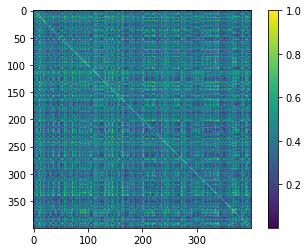

In [188]:
plt.imshow(ds_M)
plt.colorbar()

In [189]:
ds_w =(ds_M<0.08).sum(axis=0)
ds_w = 1/ds_w

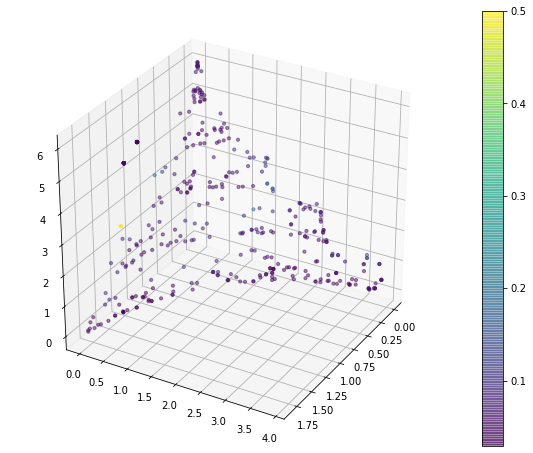

In [190]:
fig = plt.figure(figsize=[10,8])
ax = fig.gca(projection="3d")
scat = ax.scatter(*ds_p.T, s=10, c=ds_w, alpha = 0.5)
ax.view_init(30, 30)
fig.colorbar(scat)

In [191]:
jon_p = orig_p[:400]
rem_p = orig_p[400:]

In [201]:
jon_M = distance_matrix(jon_p, normalise=False)
jon_M[jon_M==0] = jon_M.max()

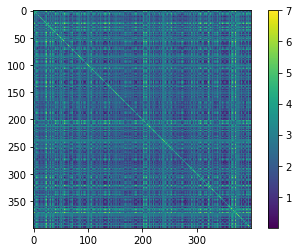

In [202]:
plt.imshow(jon_M)
plt.colorbar()

In [203]:
import copy

In [254]:
jon_p_cp = copy.deepcopy(jon_p)
jon_M_cp =  copy.deepcopy(jon_M)
for p in rem_p:
    arg_p = np.argmin(jon_M_cp)
    i = arg_p//jon_M_cp.shape[0]
    j = arg_p%jon_M_cp.shape[0]
    min_M = jon_M_cp[i,j]
    
    min_p = np.sqrt(((p-jon_p_cp)**2).sum(axis=1))
    if min_p.min()<min_M:
        # query point no improvement
        pass
    else:
        jon_M_cp[i] = min_p
        jon_M_cp[:, i] = min_p.T
        jon_M_cp[i, i] = jon_M.max()
        jon_p_cp[i] = p
# jon_M_cp[jon_M_cp==0] = 1

In [255]:
jon_p_cp.shape

(400, 3)

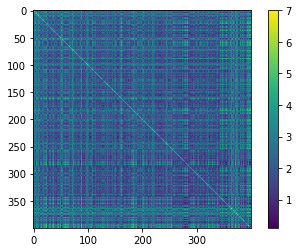

In [256]:
plt.imshow(jon_M_cp)
plt.colorbar()

In [263]:
jon_w =(jon_M_cp<1.2).sum(axis=0)
jon_w = 1/jon_w

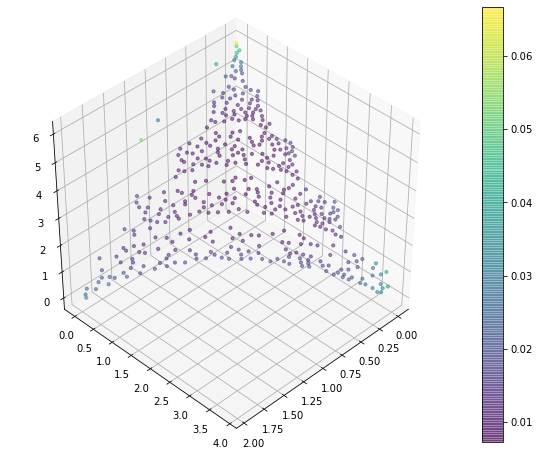

In [270]:
fig = plt.figure(figsize=[10,8])
ax = fig.gca(projection="3d")
scat = ax.scatter(*jon_p_cp.T, s=10, c=jon_w, alpha = 0.5)
ax.view_init(40, 45)
fig.colorbar(scat)

In [35]:
np.savetxt("original_points.csv", p, delimiter=",")
np.savetxt("original_densities.csv", w, delimiter=",")


np.savetxt("downsampled_points.csv", p[locs], delimiter=",")
np.savetxt("downsampled_densities.csv", w2, delimiter=",")


np.savetxt("downsampled_indices.csv", locs, delimiter=",")